In [2]:
import pandas as pd
import numpy as np

In [4]:
x = pd.Series([2.1,2.3,4.5,2.2,2.1,6])

Our goal is to identify all the outliers aka anomalies that exist in the pandas series

first we calculate the median of the dataset by calling the method median from the library numpy

define a treshold by which we assess all the deviations from the median 

the ouliers list will receive all the aoutliers and list them at the end 


In [5]:
median = np.median(x)
treshhold = 2
outliers = []
for item in x:
    if abs(item - median) > treshhold:
        outliers.append(item)

In [7]:
print("In the series ",x)
if len(outliers) > 0:
    print("The outliers are : ",outliers)
else:
    print("There is no outliers")

In the series  0    2.1
1    2.3
2    4.5
3    2.2
4    2.1
5    6.0
dtype: float64
The outliers are :  [4.5, 6.0]


In [11]:
x_mean = pd.Series([2.0,2.5,4.5,2.4,6,3.2])

with the data set provided we will deternimed wich values seems to be an outlier based on the mean and the standard deviation

calculate the mean, std, and initialize outliers array to empty list to start

In [16]:
mean_of_x_mean = np.mean(x_mean)
std_of_x_mean = np.std(x_mean)
outliers_in_x_mean = []

for item in x_mean:
    if (item < mean_of_x_mean - std_of_x_mean) or (item > mean_of_x_mean + std_of_x_mean):
        outliers_in_x_mean.append(item)
        
outliers_in_x_mean




[2.0, 6.0]

In [27]:
median_in_x_mean = np.median(x_mean)
treshhold_for_x_mean = 1
outliers_in_x_mean_using_median = []
for item in x_mean:
    if abs(item - median_in_x_mean > treshhold_for_x_mean):
        outliers_in_x_mean_using_median.append(item)
outliers_in_x_mean_using_median


[4.5, 6.0]

Using the z and comparing it againt a reasonable treshold we can identify ouliers

z = (value - mean ) / standard deviation

In [28]:
mean_of_x_mean1 = np.mean(x_mean)
std_of_x_mean1 = np.std(x_mean)
outliers_in_x_mean_using_z_score = []
treshhold_for_x_mean_using_z_score = 2.3
for item in x_mean:
    if item - (mean_of_x_mean1 / std_of_x_mean1) > treshhold_for_x_mean_using_z_score:
        outliers_in_x_mean_using_z_score.append(item)
outliers_in_x_mean_using_z_score

[6.0]

Interquartile Range for Anomaly Detection

IQR
We can use IQR to detect anomaly in the data 

A quartile divides the data into 3 points and 4 intervals

The IQR is the difference between the 3rd quartile (q3) and the first quartile(q1)

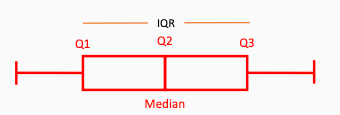

 Consider the series of widths from the previous slide as a list as shown below;

 Widths = [2.3, 2.2, 4.5, 2.1, 2.5]

We first sort this list from smallest to largest.

 Widths = [2.1, 2.2, 2.3, 2.5, 4.5]

The first quartile is at 25%, which is 2.2.

The second quartile is 50%, which is 2.3 (median).

The third quartile is 75%, which is 2.5.

Use the numpy.percentile() function to get the quartiles of a dataset.

Automatically sorts the data from smallest to largest.

We consider an anomaly any value less than (Q1 − 1.5x IQR) or greater than (Q3 + 1.5x IQR) is considered an
anomaly.


In [14]:
x = pd.Series([2.3, 2.2, 4.5, 2.1, 2.5])
x.sort_values(inplace=True, ascending=True)
x.reset_index(inplace=True, drop=True)
q1, q3 = np.percentile(x, [25,75])
iqr = q3 - q1
outliers = []
for item in x:
    if item < (q1 - 1.5 * iqr) or item > ( q3 + 1.5 * iqr) : 
        outliers.append(item)
        
outliers

[4.5]

Questions 

1. Consider the given dataset x=[1,2,3,4,5]. What is the second quartile (Q2) of the dataset?

• 2

• 3

• 4

2. Compute the interquartile range for the dataset x=[1,2,3,4,5].

• 1

• 2

• 3

Dealing With Missing Values

 Apart from outliers/anomalies, data also often contains missing values.
 
 A missing value means loss of information.

 In pandas, an NaN indicates a missing value.

 Consider the following dataframe called data with one missing value in the ‘Age’ column.

 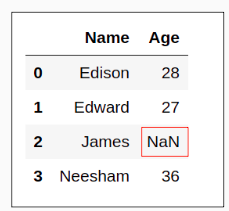
 

Finding Missing Values in Pandas

 The .isnull() function tells us if a cell is empty or not.

 Use the .sum() function with the .isnull() function to find total number of missing values in the data.

 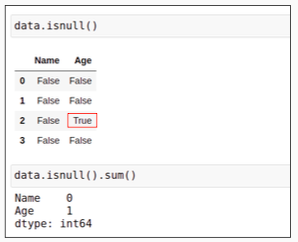

Dealing with Missing Values in Pandas

• There are a number of ways to deal with these missing values.

• Which method to use depends upon the kind of data and the task that the data is supposed to accomplish.

• Different Methods Used are;

• Deleting rows with missing values.

• Replacing missing values with mean/median/mode.


Deleting Rows with Missing Values

• One way to deal with the missing values is to delete the rows containing missing values.

• Use the .dropna() with inplace set to True to remove missing values from the dataset.

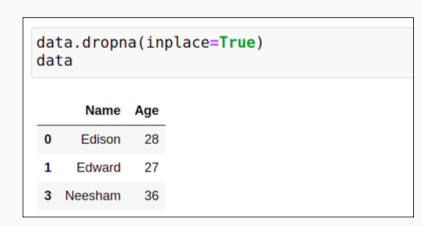


Replacing Missing Values with Mean/Median/Mode

• We can also replace the missing values in each column with one of the statistical measures (mean/median/mode) of that column.

• Use the .fillna() method to fill the missing values with mean, median, or mode.

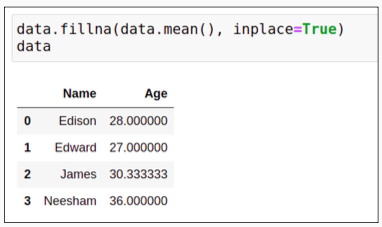

• In this example, we replace the missing value in the ‘Age’ column with the mode of the ‘Age’ column.

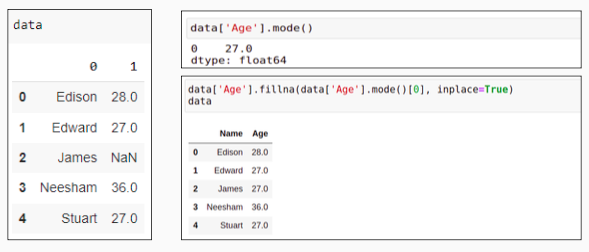

Feature Scaling
• Sometimes, we might wish to normalize the range of each feature (column) of the given dataset.

• For example, consider the given dataframe where the range of each feature (column) is different.

• We would like to scale all the features to the same range, e.g. 0-1, 1-100, etc.

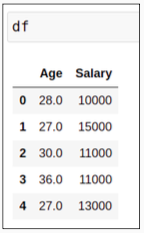


Normalization

• One simple method of feature scaling is normalization, also called min-max scaling.

• For every value in a feature (column), we subtract the minimum value of the particular feature (column) from it and divide it by the difference of maximum and minimum value of that feature (column).

• Normalized value = (original value – minimum) / (maximum – minimum)

• This method scales the features in the range [0, 1]

• For min-max scaling, use the following line of code;

• normalized_df=(df-df.min())/(df.max()-df.min())

• Pandas will automatically use the feature (column) min-max values for each feature.

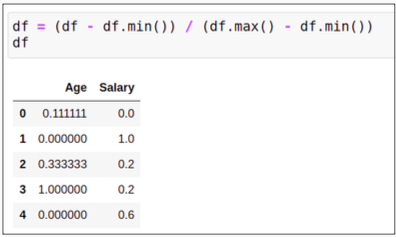

Standardization
• In standardization, for each value of a feature (column), we subtract the mean of that feature (column) from the value and divide the result by the standard deviation of that feature (column).

• Standardized value = (original value – mean) / standard deviation

• As a result, the standard deviation of the feature (column) becomes 1.

• For standardization, use the following line of code;

• standardized_df=(df-df.mean())/df.std()

• Once again, Pandas will automatically use the feature (column) mean and std values for each feature.

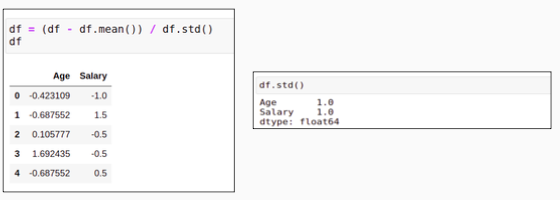


Regular Expression 

• Regular Expression or RegEx is an expression containing a sequence of characters for matching patterns in strings.

• Almost all the major programming languages have implementation for RegEx.

• The 're' module of Python is used for pattern matching using RegEx in Python.

• Following functions are available in the 're' module;

• findall()

• search()

• sub()

re.findall()

• re.findall() is used to match all the occurrences of a pattern in a string.

• A list with all the matches is returned.

• In the given figure, we find how many times does the word 'Python' appear in the given string.

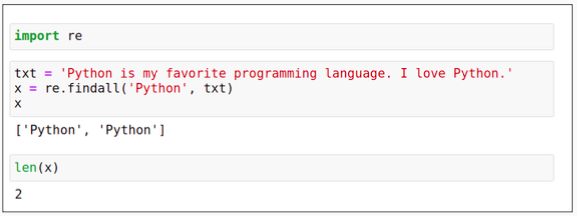

• In the given figure, we check if the string x starts with the word 'Python' or not.

• The ^ character returns a match only if the string starts with the pattern given after ^ symbol.

• The string y contains the word Python but does not begin with it, hence we get an empty list.

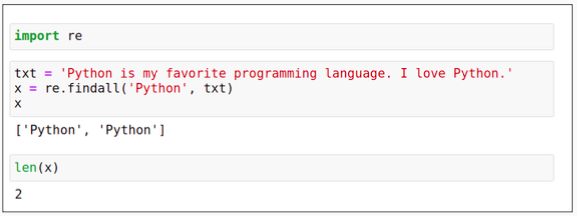

• To match numbers in a string, we use the \d sequence.

• A + sign at the end of \d makes sure that number such as 50 is treated as 50 and not as 5 and 0.

• You can find a list of sequences at https://www.w3schools.com/python/python_regex.asp

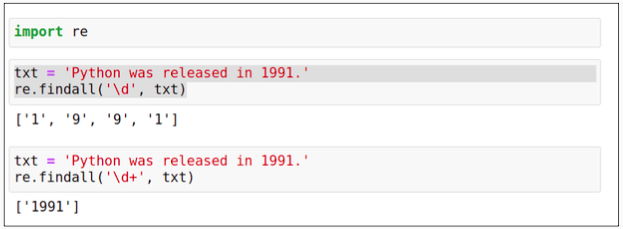

• To find matches in a Series, we first convert the Series into a string using the .to_string() method.

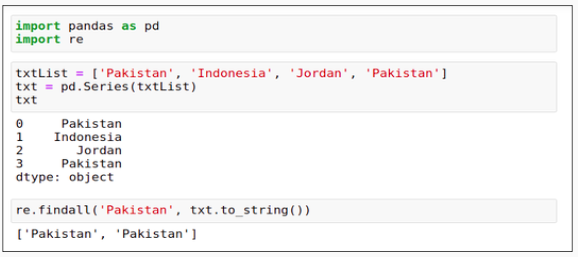



re.search()

• re.search() returns a Match Object in case of a pattern match in the string.

• We can get the position of the match using the .span() method of the Match Object.

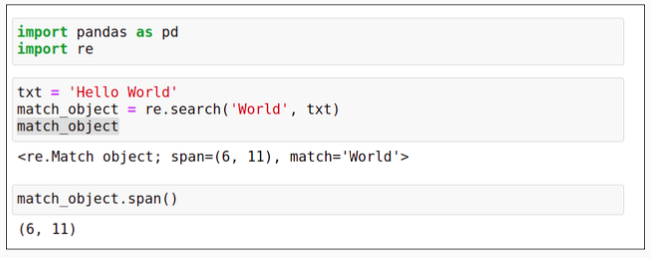



re.sub()

• To replace text in a string with a different text, use the re.sub() method.

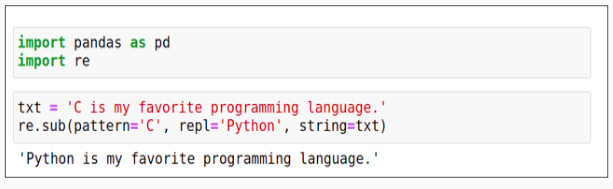

Resources 

 https://regex101.com/ is a very good website to create and test regular expressions.
 
• https://www.w3schools.com/python/pandas/pandas_cleaning.asp

• https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/

• https://www.kdnuggets.com/2021/04/data-science-101-normalization-standardization-regularization.html

• https://www.w3schools.com/python/python_regex.asp